In [73]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
import pandas_profiling as pp
import bamboolib as bam
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('vehicles.csv')

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [5]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [6]:
100 * df.isnull().sum() / len(df)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.256281
manufacturer      4.760135
model             1.422282
condition        42.860257
cylinders        38.174689
fuel              0.686247
odometer         17.241751
title_status      0.414364
transmission      0.492372
vin              45.119296
drive            27.993869
size             67.904481
type             26.868939
paint_color      31.030701
image_url         0.005506
description       0.006195
county          100.000000
state             0.000000
lat               1.889416
long              1.889416
dtype: float64

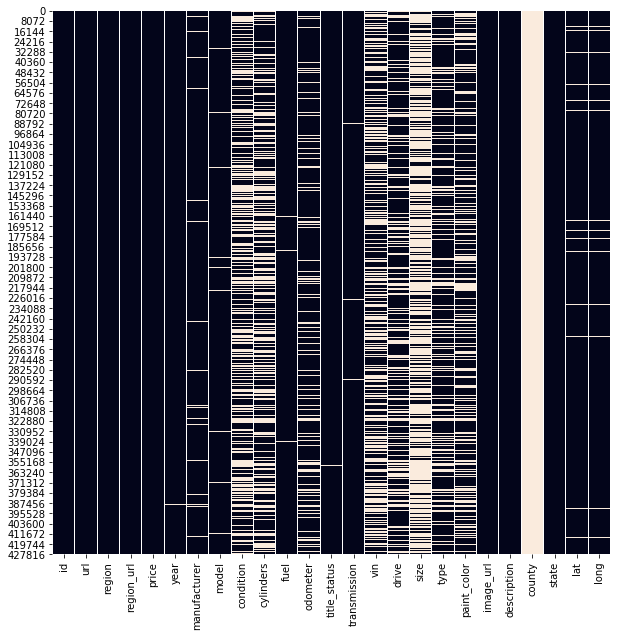

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cbar=False);

In [8]:
df['manufacturer'].unique()

array(['jeep', 'bmw', 'dodge', 'chevrolet', nan, 'ford', 'ram', 'honda',
       'toyota', 'nissan', 'subaru', 'gmc', 'volkswagen', 'kia', 'acura',
       'chrysler', 'hyundai', 'cadillac', 'volvo', 'mini',
       'mercedes-benz', 'audi', 'mazda', 'pontiac', 'buick', 'infiniti',
       'mitsubishi', 'rover', 'lincoln', 'lexus', 'fiat', 'jaguar',
       'mercury', 'saturn', 'datsun', 'porche', 'tesla',
       'harley-davidson', 'ferrari', 'land rover', 'alfa-romeo', 'morgan',
       'aston-martin'], dtype=object)

In [9]:
df.year.describe()

count    434732.000000
mean       2009.866460
std           9.312503
min        1900.000000
25%        2007.000000
50%        2012.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

In [10]:
df.odometer.describe()

count    3.607010e+05
mean     9.897590e+04
std      1.134990e+05
min      0.000000e+00
25%      4.733300e+04
50%      9.118800e+04
75%      1.347360e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [11]:
df[df['odometer'] > 300000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
267,7120302677,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,https://oregoncoast.craigslist.org,0,1996.0,ford,f-250,NaN,8 cylinders,diesel,340272.0,clean,manual,1FTHX26F4TEA74745,4wd,NaN,truck,NaN,https://images.craigslist.org/00K0K_3wneG97zmf...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250
932,7121507543,https://phoenix.craigslist.org/evl/cto/d/mesa-...,phoenix,https://phoenix.craigslist.org,1500,2007.0,ford,focus,good,4 cylinders,gas,330000.0,clean,automatic,NaN,fwd,compact,sedan,black,https://images.craigslist.org/00n0n_h6JcY0dnjE...,"Body excellent, interior excellent. Electric s...",NaN,az,33.3848,-111.8970
1002,7111631846,https://rapidcity.craigslist.org/ctd/d/windom-...,rapid city / west SD,https://rapidcity.craigslist.org,14950,2015.0,NaN,ISUZU NRR,excellent,4 cylinders,diesel,300990.0,clean,automatic,JALE5W160F7302514,NaN,full-size,truck,white,https://images.craigslist.org/00101_a5nwKAiTlM...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2015 ISUZU ...,NaN,sd,43.8634,-95.1139
1053,7111563446,https://rapidcity.craigslist.org/ctd/d/windom-...,rapid city / west SD,https://rapidcity.craigslist.org,9950,2005.0,ford,excursion,good,8 cylinders,diesel,302724.0,clean,automatic,1FMSU45P45EB76677,4wd,full-size,SUV,blue,https://images.craigslist.org/01010_gBwSj7m7ll...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2005 FORD E...,NaN,sd,43.8633,-95.1138
1157,7121484986,https://phoenix.craigslist.org/nph/cto/d/phoen...,phoenix,https://phoenix.craigslist.org,9500,1994.0,NaN,freightliner fld120,good,6 cylinders,diesel,400000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/01313_87b6MXOX7S...,1994 freightliner FlD120 New steer Tirs 10 sp...,NaN,az,33.6299,-112.1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434587,7109287314,https://richmond.craigslist.org/ctd/d/greensbo...,richmond,https://richmond.craigslist.org,0,2013.0,NaN,PETERBILT 389,NaN,NaN,diesel,714915.0,clean,manual,1XPXD49X7DD197000,NaN,NaN,NaN,NaN,https://images.craigslist.org/00x0x_f9Jlh6mMKV...,Piedmont Peterbilt Internet Sales at 336-203-8...,NaN,va,36.0334,-79.8626
434815,7121452118,https://flagstaff.craigslist.org/cto/d/flagsta...,flagstaff / sedona,https://flagstaff.craigslist.org,3100,2007.0,toyota,prius hybrid,good,4 cylinders,hybrid,308000.0,clean,automatic,NaN,fwd,compact,hatchback,red,https://images.craigslist.org/00Y0Y_dgt8zIdQQH...,Everything works as it should A/c = COLD Heate...,NaN,az,35.1859,-111.6620
435297,7117495221,https://medford.craigslist.org/ctd/d/gladstone...,medford-ashland,https://medford.craigslist.org,0,1999.0,ram,2500 laramie slt long,excellent,6 cylinders,diesel,352781.0,clean,automatic,1B7KF2366XJ569670,4wd,full-size,truck,blue,https://images.craigslist.org/00Y0Y_4t9sTDdkC5...,Carz Planet STOCK #: 6498 💲 💲 FOR...,NaN,or,45.3860,-122.6080
435728,7119682628,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,5900,1999.0,gmc,t6500,NaN,NaN,diesel,320000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00n0n_5EsIro50yr...,GMC T6500 Stake Bed. 320k miles. CAT Diesel. E...,NaN,az,34.4814,-114.3480


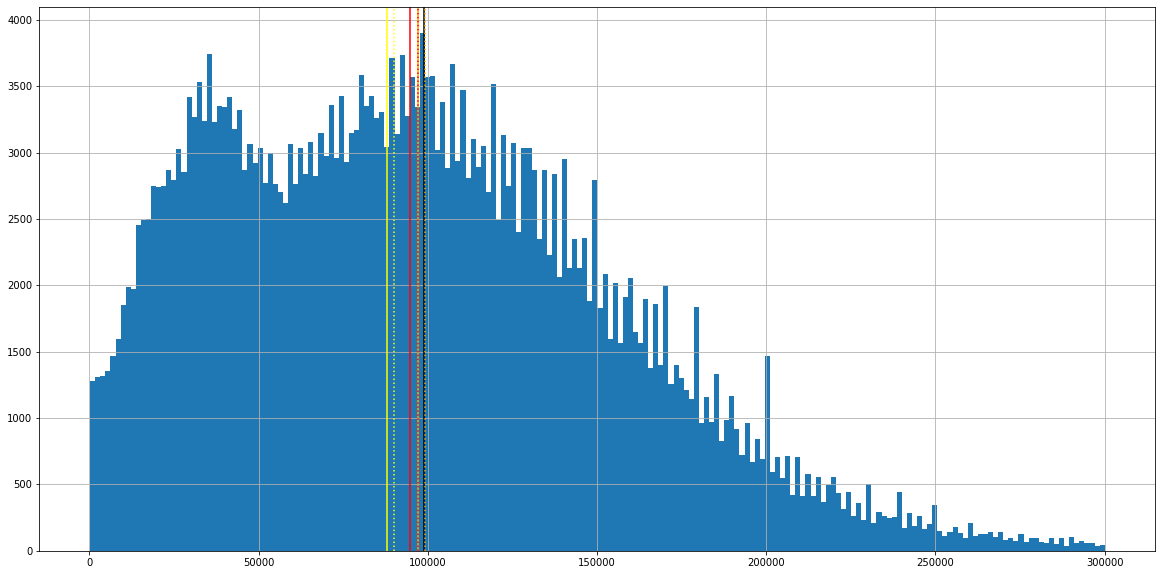

In [12]:
plt.figure(figsize = (20,10))
df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['odometer'].hist(bins = 200)
plt.axvline(df['odometer'].mean(), color = 'black')
plt.axvline(df[df['odometer'] < 1000000]['odometer'].mean(), color = 'orange')
plt.axvline(df[df['odometer'] < 300000]['odometer'].mean(), color = 'red')
plt.axvline(df[df['odometer'] < 200000]['odometer'].mean(), color = 'yellow')
plt.axvline(df[(df['odometer'] < 1000000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'orange', ls = ':')
plt.axvline(df[(df['odometer'] < 300000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'red', ls = ':')
plt.axvline(df[(df['odometer'] < 200000) & (df['odometer'] > 1000)]['odometer'].mean(), color = 'yellow', ls = ':')

In [13]:
bins = np.arange(df['year'].min(), df['year'].max(), 10)
bins = np.append(bins, 2021)
groups = pd.cut(df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['year'], bins, include_lowest=True)

In [14]:
od_avgs = []
for i in range(1000):
    od_avgs.append(sum(random.sample(list(df[(df['odometer'] < 300000) & (df['odometer'] > 250)]['odometer']), 1000)) / 1000)
od_avg = sum(od_avgs) / 1000
od_avg

96783.90123399993

In [15]:
(df['odometer'] ==).sum()

SyntaxError: invalid syntax (<ipython-input-15-90790e344eb3>, line 1)

In [17]:
od_decade_means = df[(df['odometer'] < 300000) & (df['odometer'] > 250)].groupby(groups)['odometer'].agg(['mean', 'size']).head(500)

In [18]:
od_decade_means

,mean,size
year,,
"(1899.999, 1910.0]",86779.000000,1
"(1910.0, 1920.0]",7675.000000,6
"(1920.0, 1930.0]",34051.344828,58
"(1930.0, 1940.0]",24165.683761,117
"(1940.0, 1950.0]",41519.645833,144
"(1950.0, 1960.0]",49592.645892,353
"(1960.0, 1970.0]",59458.211575,1054
"(1970.0, 1980.0]",70270.250165,1511
"(1980.0, 1990.0]",105626.272727,2442


In [19]:
conditions = [
                (df['year'] <= 1910) & (df['odometer'].isnull()),
                (df['year'] > 1910) & (df['year'] <= 1920) & (df['odometer'].isnull()),
                (df['year'] > 1920) & (df['year'] <= 1930) & (df['odometer'].isnull()),
                (df['year'] > 1930) & (df['year'] <= 1940) & (df['odometer'].isnull()),
                (df['year'] > 1940) & (df['year'] <= 1950) & (df['odometer'].isnull()),
                (df['year'] > 1950) & (df['year'] <= 1960) & (df['odometer'].isnull()),
                (df['year'] > 1960) & (df['year'] <= 1970) & (df['odometer'].isnull()),
                (df['year'] > 1970) & (df['year'] <= 1980) & (df['odometer'].isnull()),
                (df['year'] > 1980) & (df['year'] <= 1990) & (df['odometer'].isnull()),
                (df['year'] > 1990) & (df['year'] <= 2000) & (df['odometer'].isnull()),
                (df['year'] > 2000) & (df['year'] <= 2010) & (df['odometer'].isnull()),
                (df['year'] > 2010) & (df['year'] <= 2020) & (df['odometer'].isnull()),
                (df['year'] > 2020) & (df['odometer'].isnull())
]

choices = [
            int(od_decade_means.iloc[0,0]),
            int(od_decade_means.iloc[1,0]),
            int(od_decade_means.iloc[2,0]),
            int(od_decade_means.iloc[3,0]),
            int(od_decade_means.iloc[4,0]),
            int(od_decade_means.iloc[5,0]),
            int(od_decade_means.iloc[6,0]),
            int(od_decade_means.iloc[7,0]),
            int(od_decade_means.iloc[8,0]),
            int(od_decade_means.iloc[9,0]),
            int(od_decade_means.iloc[10,0]),
            int(od_decade_means.iloc[11,0]),
            int(od_decade_means.iloc[12,0])
]
df_clean = df.copy()
df_clean['odometer'] = np.select(conditions, choices, default = df['odometer'])

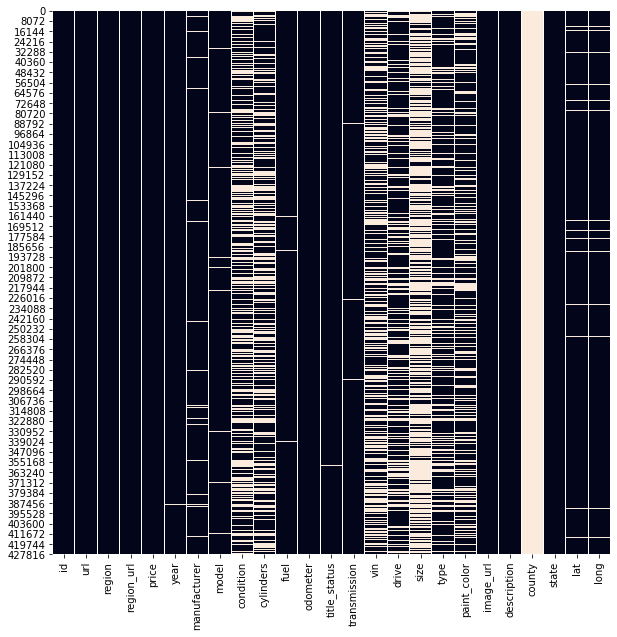

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.isnull(), cbar=False);

In [21]:
df_clean['region'].unique().size

403

In [22]:
paint_color_probs_dict = df_clean.groupby(by = ['manufacturer'])['paint_color'].value_counts(normalize = True).unstack().to_dict('index')

In [23]:
paint_color_probs_dict

{'acura': {'black': 0.24325396825396825,
  'blue': 0.06746031746031746,
  'brown': 0.016666666666666666,
  'custom': 0.023412698412698413,
  'green': 0.013095238095238096,
  'grey': 0.1742063492063492,
  'orange': 0.0011904761904761906,
  'purple': 0.0007936507936507937,
  'red': 0.04563492063492063,
  'silver': 0.19007936507936507,
  'white': 0.22420634920634921,
  'yellow': nan},
 'alfa-romeo': {'black': 0.18181818181818182,
  'blue': 0.09090909090909091,
  'brown': nan,
  'custom': nan,
  'green': 0.05454545454545454,
  'grey': 0.10909090909090909,
  'orange': nan,
  'purple': nan,
  'red': 0.2545454545454545,
  'silver': 0.03636363636363636,
  'white': 0.2545454545454545,
  'yellow': 0.01818181818181818},
 'aston-martin': {'black': 0.22727272727272727,
  'blue': 0.13636363636363635,
  'brown': nan,
  'custom': 0.045454545454545456,
  'green': 0.22727272727272727,
  'grey': 0.045454545454545456,
  'orange': nan,
  'purple': nan,
  'red': 0.045454545454545456,
  'silver': 0.272727272

In [24]:
rand_choice_paint_color_probs_dict = {}
for i in paint_color_probs_dict:
    colors_list = []
    probs_list = []
    for j in paint_color_probs_dict[i]: 
        if paint_color_probs_dict[i][j] > 0:
            colors_list.append(j)
            probs_list.append(paint_color_probs_dict[i][j])
#             temp_dict[j] = paint_color_probs_dict[i][j]
    rand_choice_paint_color_probs_dict[i] = {'colors': colors_list, 'probabilities': probs_list}
all_probs = df_clean['paint_color'].value_counts(normalize = True)
rand_choice_paint_color_probs_dict['all'] = {'colors': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_paint_color_probs_dict

{'acura': {'colors': ['black',
   'blue',
   'brown',
   'custom',
   'green',
   'grey',
   'orange',
   'purple',
   'red',
   'silver',
   'white'],
  'probabilities': [0.24325396825396825,
   0.06746031746031746,
   0.016666666666666666,
   0.023412698412698413,
   0.013095238095238096,
   0.1742063492063492,
   0.0011904761904761906,
   0.0007936507936507937,
   0.04563492063492063,
   0.19007936507936507,
   0.22420634920634921]},
 'alfa-romeo': {'colors': ['black',
   'blue',
   'green',
   'grey',
   'red',
   'silver',
   'white',
   'yellow'],
  'probabilities': [0.18181818181818182,
   0.09090909090909091,
   0.05454545454545454,
   0.10909090909090909,
   0.2545454545454545,
   0.03636363636363636,
   0.2545454545454545,
   0.01818181818181818]},
 'aston-martin': {'colors': ['black',
   'blue',
   'custom',
   'green',
   'grey',
   'red',
   'silver'],
  'probabilities': [0.22727272727272727,
   0.13636363636363635,
   0.045454545454545456,
   0.22727272727272727,
   0.045

In [25]:
def rand_paint(row):
    key = row['manufacturer']
    if (type(row['paint_color']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_paint_color_probs_dict[key]['colors'], 1, p=rand_choice_paint_color_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_paint_color_probs_dict['all']['colors'], 1, p=rand_choice_paint_color_probs_dict['all']['probabilities'])[0]
    return row['paint_color']


df_clean['paint_color'] = df_clean.apply(lambda x: rand_paint(x), axis = 1)

In [26]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer            25
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color          0
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

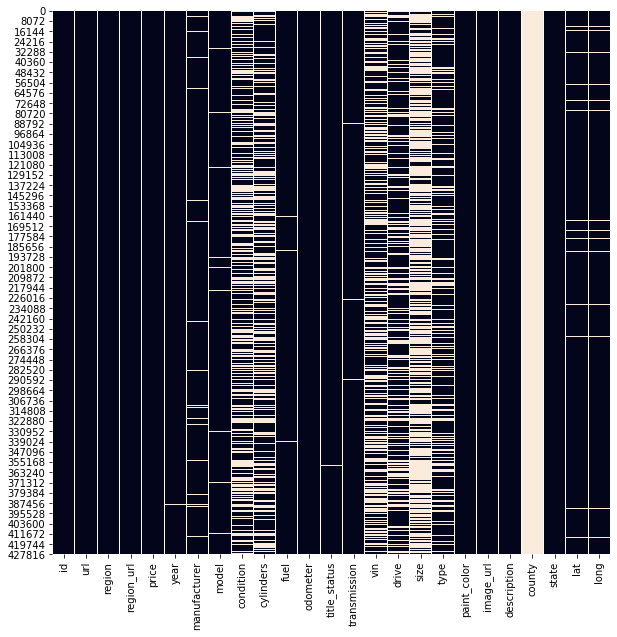

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.isnull(), cbar=False);

In [28]:
final_paint_color_probs_dict = df_clean.groupby(by = ['manufacturer'])['paint_color'].value_counts(normalize = True).unstack().to_dict('index')

In [29]:
final_paint_color_probs_dict

{'acura': {'black': 0.24002313475997686,
  'blue': 0.06795835743204165,
  'brown': 0.0167727009832273,
  'custom': 0.022556390977443608,
  'green': 0.01098901098901099,
  'grey': 0.17408906882591094,
  'orange': 0.001156737998843262,
  'purple': 0.0008675534991324465,
  'red': 0.04771544245228456,
  'silver': 0.18594563331405436,
  'white': 0.23192596876807403,
  'yellow': nan},
 'alfa-romeo': {'black': 0.1791044776119403,
  'blue': 0.08955223880597014,
  'brown': nan,
  'custom': nan,
  'green': 0.04477611940298507,
  'grey': 0.11940298507462686,
  'orange': nan,
  'purple': nan,
  'red': 0.2537313432835821,
  'silver': 0.04477611940298507,
  'white': 0.2537313432835821,
  'yellow': 0.014925373134328358},
 'aston-martin': {'black': 0.20588235294117646,
  'blue': 0.14705882352941177,
  'brown': nan,
  'custom': 0.058823529411764705,
  'green': 0.23529411764705882,
  'grey': 0.058823529411764705,
  'orange': nan,
  'purple': nan,
  'red': 0.058823529411764705,
  'silver': 0.235294117647

In [30]:
paint_color_probs_dict

{'acura': {'black': 0.24325396825396825,
  'blue': 0.06746031746031746,
  'brown': 0.016666666666666666,
  'custom': 0.023412698412698413,
  'green': 0.013095238095238096,
  'grey': 0.1742063492063492,
  'orange': 0.0011904761904761906,
  'purple': 0.0007936507936507937,
  'red': 0.04563492063492063,
  'silver': 0.19007936507936507,
  'white': 0.22420634920634921,
  'yellow': nan},
 'alfa-romeo': {'black': 0.18181818181818182,
  'blue': 0.09090909090909091,
  'brown': nan,
  'custom': nan,
  'green': 0.05454545454545454,
  'grey': 0.10909090909090909,
  'orange': nan,
  'purple': nan,
  'red': 0.2545454545454545,
  'silver': 0.03636363636363636,
  'white': 0.2545454545454545,
  'yellow': 0.01818181818181818},
 'aston-martin': {'black': 0.22727272727272727,
  'blue': 0.13636363636363635,
  'brown': nan,
  'custom': 0.045454545454545456,
  'green': 0.22727272727272727,
  'grey': 0.045454545454545456,
  'orange': nan,
  'purple': nan,
  'red': 0.045454545454545456,
  'silver': 0.272727272

In [31]:
df_clean[df_clean['odometer'].isnull()][['year', 'odometer']] #some cars have no year and odometer value

,year,odometer
28526,NaN,NaN
40969,NaN,NaN
74356,NaN,NaN
74400,NaN,NaN
80723,NaN,NaN
87185,NaN,NaN
87528,NaN,NaN
87633,NaN,NaN
89520,NaN,NaN
92583,NaN,NaN


In [32]:
df_clean.dropna(subset = ['year'], inplace = True) # get rid of the 25 rows that have no value for year and odometer

In [33]:
df_clean['vin'] = df_clean['vin'].apply(lambda x: 0 if type(x) == float else 1) #replace vin column with binary yes/no column

In [34]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders       166352
fuel              2734
odometer             0
title_status      1583
transmission      2122
vin                  0
drive           121823
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [35]:
condition = [
                (df_clean['description'].str.contains('diesel', case = False)) & (df_clean['fuel'].isnull()),
                (df_clean['description'].str.contains('hybrid', case = False)) & (df_clean['fuel'].isnull()),
                (df_clean['description'].str.contains('electric', case = False)) & (df_clean['fuel'].isnull())
]
choice = [
            'diesel',
            'hybrid',
            'electric'
]
df_clean['fuel'] = np.select(condition, choice, default = df_clean['fuel'])

In [36]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      2122
vin                  0
drive           121823
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [37]:
df_clean[df_clean['fuel'].isnull()]['description'].head()

104    2012 *Jeep* *Grand Cherokee* Laredo SUV - $11,...
382    2007 *Chevrolet* *Impala* 4dr Sedan 3.5L LT - ...
460    2010 *Chevrolet* *Avalanche* 2WD Crew Cab LTZ ...
628    2006 *Lincoln* *Town Car* 4dr Sedan Signature ...
666    2015 *Chevrolet* *Tahoe* 4WD 4dr LT SUV - $28,...
Name: description, dtype: object

In [38]:
df_clean['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [39]:
condition = [
                (df_clean['description'].str.contains('4wd', case = False)) & (df_clean['drive'].isnull()),
                (df_clean['description'].str.contains('fwd', case = False)) & (df_clean['drive'].isnull()),
                (df_clean['description'].str.contains('rwd', case = False)) & (df_clean['drive'].isnull())
]
choice = [
            '4wd',
            'fwd',
            'rwd'
]
df_clean['drive'] = np.select(condition, choice, default = df_clean['drive'])

In [40]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      2122
vin                  0
drive           101348
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [41]:
((df_clean['description'].str.contains('2wd', case = False)) & (df_clean['drive'].isnull())).sum()

2277

In [42]:
drive_dict = df_clean.groupby(by = ['manufacturer'])['drive'].value_counts(normalize = True).unstack().to_dict('index')

In [43]:
rand_choice_drive_probs_dict = {}
for i in drive_dict:
    drive_list = []
    probs_list = []
    for j in drive_dict[i]: 
        if drive_dict[i][j] > 0:
            drive_list.append(j)
            probs_list.append(drive_dict[i][j])
    rand_choice_drive_probs_dict[i] = {'drive': drive_list, 'probabilities': probs_list}
all_probs = df_clean['drive'].value_counts(normalize = True)
rand_choice_drive_probs_dict['all'] = {'drive': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_drive_probs_dict

{'acura': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.3762337149624951,
   0.6032372680615871,
   0.020529016975917885]},
 'alfa-romeo': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.26785714285714285,
   0.08928571428571429,
   0.6428571428571429]},
 'aston-martin': {'drive': ['rwd'], 'probabilities': [1.0]},
 'audi': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.811411992263056,
   0.1766602192134107,
   0.011927788523533205]},
 'bmw': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.4038090919396894,
   0.0256206779276726,
   0.570570230132638]},
 'buick': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.1832396774981676,
   0.7656975323723431,
   0.051062790129489374]},
 'cadillac': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.4294491990344525,
   0.2951503181917928,
   0.2754004827737547]},
 'chevrolet': {'drive': ['4wd', 'fwd', 'rwd'],
  'probabilities': [0.47264707684139595,
   0.2946846092585408,
   0.2326683139000633]},
 'chry

In [44]:
((df_clean['manufacturer'].isnull())).sum()

19638

In [45]:
def impute_drive(row):
    key = row['manufacturer']
    if (type(row['drive']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_drive_probs_dict[key]['drive'], 1, p=rand_choice_drive_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_drive_probs_dict['all']['drive'], 1, p=rand_choice_drive_probs_dict['all']['probabilities'])[0]
    return row['drive']


df_clean['drive'] = df_clean.apply(lambda x: impute_drive(x), axis = 1)

In [46]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      2122
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [47]:
df_clean['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [48]:
((df_clean['description'].str.contains('manual', case = False)) & (df_clean['transmission'].isnull())).sum()

169

In [49]:
condition = [
                (df_clean['description'].str.contains('manual', case = False)) & (df_clean['transmission'].isnull()),
                (df_clean['description'].str.contains('automatic', case = False)) & (df_clean['transmission'].isnull())
]
choice = [
            'manual',
            'automatic'
]
df_clean['transmission'] = np.select(condition, choice, default = df_clean['transmission'])

In [50]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders       166352
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [51]:
df['description'].str.contains('6 cyl', case = False).sum()

22514

In [52]:
condition = [
                (df_clean['description'].str.contains('3 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('4 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('5 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('6 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('8 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('10 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('12 cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('3cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('4cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('5cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('6cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('8cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('10cyl', case = False)) & (df_clean['cylinders'].isnull()),
                (df_clean['description'].str.contains('12cyl', case = False)) & (df_clean['cylinders'].isnull())
    
    
]
choice = [
            '3 cylinders',
            '4 cylinders',
            '5 cylinders',
            '6 cylinders',
            '8 cylinders',
            '10 cylinders',
            '12 cylinders',
            '3 cylinders',
            '4 cylinders',
            '5 cylinders',
            '6 cylinders',
            '8 cylinders',
            '10 cylinders',
            '12 cylinders'
]
df_clean['cylinders'] = np.select(condition, choice, default = df_clean['cylinders'])

In [53]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders       140477
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [54]:
cylinder_probs_dict = df_clean.groupby(by = ['manufacturer'])['cylinders'].value_counts(normalize = True).unstack().to_dict('index')

In [55]:
rand_choice_cylinders_probs_dict = {}
for i in cylinder_probs_dict:
    cylinder_list = []
    probs_list = []
    for j in cylinder_probs_dict[i]: 
        if cylinder_probs_dict[i][j] > 0:
            cylinder_list.append(j)
            probs_list.append(cylinder_probs_dict[i][j])
    rand_choice_cylinders_probs_dict[i] = {'cylinder': cylinder_list, 'probabilities': probs_list}
all_probs = df_clean['cylinders'].value_counts(normalize = True)
rand_choice_cylinders_probs_dict['all'] = {'cylinder': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_cylinders_probs_dict

{'acura': {'cylinder': ['10 cylinders',
   '12 cylinders',
   '3 cylinders',
   '4 cylinders',
   '5 cylinders',
   '6 cylinders',
   '8 cylinders',
   'other'],
  'probabilities': [0.0008028904054596548,
   0.0072260136491368926,
   0.0004014452027298274,
   0.29706945002007223,
   0.0016057808109193096,
   0.6904857486953031,
   0.0008028904054596548,
   0.0016057808109193096]},
 'alfa-romeo': {'cylinder': ['4 cylinders', '6 cylinders'],
  'probabilities': [0.94, 0.06]},
 'aston-martin': {'cylinder': ['12 cylinders', '6 cylinders', '8 cylinders'],
  'probabilities': [0.875, 0.041666666666666664, 0.08333333333333333]},
 'audi': {'cylinder': ['10 cylinders',
   '12 cylinders',
   '3 cylinders',
   '4 cylinders',
   '5 cylinders',
   '6 cylinders',
   '8 cylinders',
   'other'],
  'probabilities': [0.006340057636887608,
   0.00028818443804034583,
   0.004322766570605188,
   0.5236311239193083,
   0.004322766570605188,
   0.3622478386167147,
   0.09596541786743516,
   0.00288184438040345

In [56]:
def impute_cylinders(row):
    key = row['manufacturer']
    if (type(row['cylinders']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_cylinders_probs_dict[key]['cylinder'], 1, p=rand_choice_cylinders_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_cylinders_probs_dict['all']['cylinder'], 1, p=rand_choice_cylinders_probs_dict['all']['probabilities'])[0]
    return row['cylinders']


df_clean['cylinders'] = df_clean.apply(lambda x: impute_cylinders(x), axis = 1)

In [57]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition       185692
cylinders            0
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [58]:
df_clean.loc[df_clean.year>=2019, 'condition'] = df_clean.loc[df_clean.year>=2019, 'condition'].fillna('like new')

In [59]:
df_clean.loc[(df_clean['year'] >= 2019)]['condition'].isnull().sum()

0

In [60]:
excellent_odo_mean = df_clean[df_clean['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df_clean[df_clean['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df_clean[df_clean['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df_clean[df_clean['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df_clean[df_clean['condition'] == 'fair']['odometer'].mean()
print('excelent {}, good {}, like_new {}, salvage {}, fair {}'.format(excellent_odo_mean, good_odo_mean,
                                                                like_new_odo_mean, salvage_odo_mean,
                                                                fair_odo_mean))

excelent 104968.78537656197, good 107567.22591560087, like_new 66882.45573321392, salvage 146100.56142857144, fair 167217.83775641944


In [62]:
df_clean.loc[df_clean['odometer'] <= like_new_odo_mean, 'condition'] = df_clean.loc[df_clean['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')
df_clean.loc[df_clean['odometer'] >= fair_odo_mean, 'condition'] = df_clean.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')
df_clean.loc[((df_clean['odometer'] > like_new_odo_mean) & 
       (df_clean['odometer'] <= excellent_odo_mean)), 'condition'] = df_clean.loc[((df_clean['odometer'] > like_new_odo_mean) & 
       (df_clean['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')
df_clean.loc[((df_clean['odometer'] > excellent_odo_mean) & 
       (df_clean['odometer'] <= good_odo_mean)), 'condition'] = df_clean.loc[((df_clean['odometer'] > excellent_odo_mean) & 
       (df_clean['odometer'] <= good_odo_mean)), 'condition'].fillna('good')
df_clean.loc[((df_clean['odometer'] > good_odo_mean) & 
       (df_clean['odometer'] <= fair_odo_mean)), 'condition'] = df_clean.loc[((df_clean['odometer'] > good_odo_mean) & 
       (df_clean['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [63]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition            0
cylinders            0
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type            117013
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [64]:
df_clean['type'].unique()

array([nan, 'sedan', 'pickup', 'convertible', 'truck', 'van', 'SUV',
       'coupe', 'mini-van', 'hatchback', 'offroad', 'wagon', 'other',
       'bus'], dtype=object)

In [65]:
condition = [
                (df_clean['description'].str.contains('sedan', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('pickup', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('convertible', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('truck', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('van', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('SUV', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('coupe', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('mini-van', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('hatchback', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('offroad', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('wagon', case = False)) & (df_clean['type'].isnull()),
                (df_clean['description'].str.contains('bus', case = False)) & (df_clean['type'].isnull())
   
    
    
]
choice = [
            'sedan',
            'pickup',
            'convertible',
            'truck',
            'van',
            'SUV',
            'coupe',
            'mini-van',
            'hatchback',
            'offroad',
            'wagon',
            'bus'
]
df_clean['type'] = np.select(condition, choice, default = df_clean['type'])

In [66]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition            0
cylinders            0
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type             57458
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [67]:
type_probs_dict = df_clean.groupby(by = ['manufacturer'])['type'].value_counts(normalize = True).unstack().to_dict('index')

In [68]:
rand_choice_type_probs_dict = {}
for i in type_probs_dict:
    type_list = []
    probs_list = []
    for j in type_probs_dict[i]: 
        if type_probs_dict[i][j] > 0:
            type_list.append(j)
            probs_list.append(type_probs_dict[i][j])
    rand_choice_type_probs_dict[i] = {'type': type_list, 'probabilities': probs_list}
all_probs = df_clean['type'].value_counts(normalize = True)
rand_choice_type_probs_dict['all'] = {'type': list(all_probs.index), 'probabilities': list(all_probs.values)}                           
rand_choice_type_probs_dict

{'acura': {'type': ['SUV',
   'bus',
   'convertible',
   'coupe',
   'hatchback',
   'mini-van',
   'other',
   'pickup',
   'sedan',
   'truck',
   'van',
   'wagon'],
  'probabilities': [0.36942458290772895,
   0.0040858018386108275,
   0.0017024174327545114,
   0.037112700034048346,
   0.012257405515832482,
   0.00034048348655090226,
   0.023152877085461356,
   0.0006809669731018045,
   0.4960844399046646,
   0.014640789921688798,
   0.03404834865509023,
   0.006469186244467144]},
 'alfa-romeo': {'type': ['SUV',
   'bus',
   'convertible',
   'coupe',
   'other',
   'sedan',
   'van'],
  'probabilities': [0.2,
   0.015384615384615385,
   0.35384615384615387,
   0.09230769230769231,
   0.015384615384615385,
   0.3076923076923077,
   0.015384615384615385]},
 'aston-martin': {'type': ['convertible', 'coupe', 'sedan'],
  'probabilities': [0.5, 0.46875, 0.03125]},
 'audi': {'type': ['SUV',
   'bus',
   'convertible',
   'coupe',
   'hatchback',
   'offroad',
   'other',
   'pickup',
   

In [69]:
def impute_type(row):
    key = row['manufacturer']
    if (type(row['type']) == float) & (type(key) != float):
        return np.random.choice(rand_choice_type_probs_dict[key]['type'], 1, p=rand_choice_type_probs_dict[key]['probabilities'])[0]
    elif (type(key) == float):
        return np.random.choice(rand_choice_type_probs_dict['all']['type'], 1, p=rand_choice_type_probs_dict['all']['probabilities'])[0]
    return row['type']


df_clean['type'] = df_clean.apply(lambda x: impute_type(x), axis = 1)

In [70]:
df_clean.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     19638
model             6173
condition            0
cylinders            0
fuel              2176
odometer             0
title_status      1583
transmission      1533
vin                  0
drive                0
size            294847
type                 0
paint_color          0
image_url            0
description          3
county          434732
state                0
lat               8211
long              8211
dtype: int64

In [72]:
df_clean['fuel'].unique()

array(['gas', 'other', 'diesel', nan, 'hybrid', 'electric'], dtype=object)

In [ ]:
pp.